# EDA & Data Preprocessing on Google App Store Rating Dataset.

# 1. Import required libraries and read the dataset.

In [3]:
#Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

from sklearn.preprocessing import FunctionTransformer

In [6]:
#Read the dataset
df=pd.read_csv("Apps_data.csv")
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [5]:
#Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.


In [7]:
#Checking first few samples
a=df.sample(40)
a

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4477,Android P Style Icon Pack,PERSONALIZATION,5.0,1,60M,100+,Paid,$0.99,Everyone,Personalization,"June 16, 2018",1.0,4.1 and up
3425,Backgrounds HD (Wallpapers),PERSONALIZATION,4.6,2390185,Varies with device,"100,000,000+",Free,0,Teen,Personalization,"August 4, 2018",Varies with device,Varies with device
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
10686,Armed Cam Gun Pack,GAME,4.2,1012,50M,"10,000+",Free,0,Teen,Action,"January 18, 2015",1.0.2,3.0 and up
5178,Replika,FAMILY,4.5,45458,35M,"1,000,000+",Free,0,Mature 17+,Entertainment,"August 3, 2018",1.5.49,4.4 and up
7433,The CJ Rubric,HEALTH_AND_FITNESS,5.0,5,43M,100+,Free,0,Everyone,Health & Fitness,"December 5, 2017",The CJ Rubric 7.12.0,4.1 and up
4851,Theme eXp - Black Z Light,PERSONALIZATION,4.3,29540,4.3M,"1,000,000+",Free,0,Everyone,Personalization,"June 15, 2016",2.0,5.0 and up
6275,BI APP,FINANCE,5.0,2,2.7M,100+,Free,0,Everyone,Finance,"February 19, 2016",1.8,4.0 and up
8035,ABC – Live TV & Full Episodes,FAMILY,3.3,50428,Varies with device,"5,000,000+",Free,0,Teen,Entertainment,"July 25, 2018",Varies with device,5.0 and up
938,"Hulu: Stream TV, Movies & more",ENTERTAINMENT,4.0,319691,Varies with device,"10,000,000+",Free,0,Teen,Entertainment,"August 3, 2018",Varies with device,5.0 and up


In [8]:
#Checking shape of the dataframe
a.shape

(40, 13)

In [9]:
#Checking info of the dataframe
a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 4477 to 8392
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             40 non-null     object 
 1   Category        40 non-null     object 
 2   Rating          36 non-null     float64
 3   Reviews         40 non-null     object 
 4   Size            40 non-null     object 
 5   Installs        40 non-null     object 
 6   Type            40 non-null     object 
 7   Price           40 non-null     object 
 8   Content Rating  40 non-null     object 
 9   Genres          40 non-null     object 
 10  Last Updated    40 non-null     object 
 11  Current Ver     40 non-null     object 
 12  Android Ver     40 non-null     object 
dtypes: float64(1), object(12)
memory usage: 4.4+ KB


In [10]:
# displays a statistical summary of the data
a.describe()

,Rating
count,36.000000
mean,4.288889
std,0.513129
min,2.400000
25%,4.175000
50%,4.400000
75%,4.525000
max,5.000000


In [11]:
#to view the object type data
a.describe(include=object)

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,40,40,40,40,40,40,40,40,40,40,40,40
unique,40,22,37,30,15,2,6,3,25,38,27,12
top,Android P Style Icon Pack,FAMILY,2,Varies with device,"10,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,Varies with device
freq,1,6,3,9,7,35,35,30,5,3,9,7


# 3. Check summary statistics of the dataset. List out the columns that need to be worked upon for model building.

In [12]:
#Summary statistics of the Dataset
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [13]:
#viewing object type data
df.describe(include=object)

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,596,1695,1579,10039,10040,8714,842,326,1459,2451


In [11]:
## INFERENCE: 
#     From my observation the columns that need to worked upon are Reviews,Price,app,category and generes.

# 4. Check if there are any duplicate records in the dataset? if any drop them.


In [14]:
#findings duplicate records
df.duplicated().sum() 

483

In [15]:
df.drop_duplicates(inplace=True) #dropping duplicate records

In [16]:
df.duplicated().sum()

0

# 5. Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them.


In [17]:
df['Category'].unique()  #checking unique categories column

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [18]:
df['Category'][df['Category']=='1.9']  #to find the index of the invalid categories
df.drop(index=10472,inplace=True)  #since '1.9' is an invalid categorgy, i dropped it.
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

# 6. Check if there are missing values present in the column Rating, If any? drop them and and create a new column as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low)


In [19]:
df['Rating'].isnull().sum() #to find missing values

1465

In [20]:
df['Rating'].info() 

<class 'pandas.core.series.Series'>
Int64Index: 10357 entries, 0 to 10840
Series name: Rating
Non-Null Count  Dtype  
--------------  -----  
8892 non-null   float64
dtypes: float64(1)
memory usage: 161.8 KB


In [21]:
df.dropna(subset='Rating',inplace=True) #dropping it

In [22]:
df['Rating'].isnull().sum()

0

In [23]:
df['Rating_category']=df['Rating'].apply(lambda i:'high' if i>3.5 else 'low')  #converting as high and low categories
df['Rating_category']

0        high
1        high
2        high
3        high
4        high
         ... 
10834    high
10836    high
10837    high
10839    high
10840    high
Name: Rating_category, Length: 8892, dtype: object

# 7. Check the distribution of the newly created column 'Rating_category' and comment on the distribution.


In [24]:
df['Rating_category'].value_counts()

high    8012
low      880
Name: Rating_category, dtype: int64

In [ ]:
##  COMMENT:
#    There are 8012 values in high rating(90.1)and 880 values in low rating(9.89%)

In [25]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Rating_category'],
      dtype='object')

# 8. Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and handle the outliers using a transformation approach.(Hint: Use log transformation)


In [26]:
df['Reviews']=df['Reviews'].astype(int)  #converting 'Review' column to numeric data type
df['Reviews'].dtype

dtype('int32')

<Axes: >

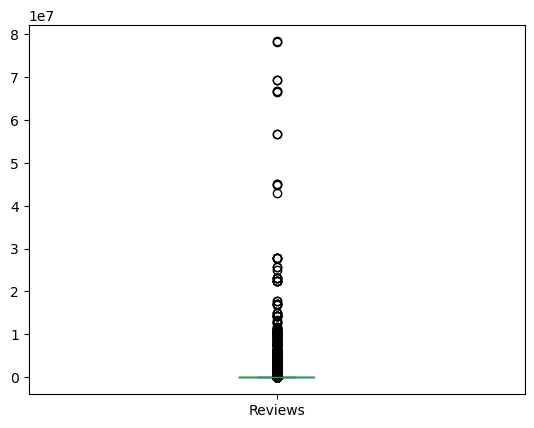

In [27]:
df['Reviews'].plot(kind='box')  #checking the outliers

<Axes: >

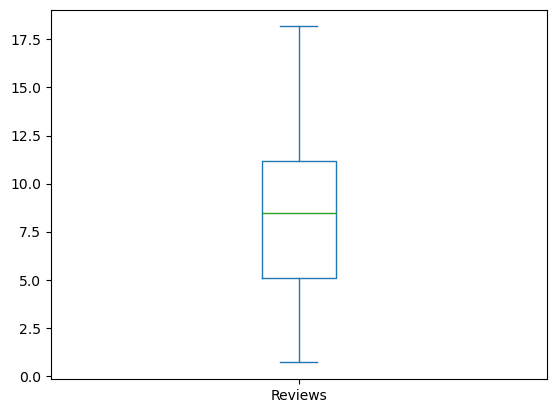

In [28]:
df['Reviews']=np.log1p(df['Reviews'])   #removing outliers using log
df['Reviews'].plot(kind='box')

# 9. The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into suitable data type. (hint: Replace M with 1 million and K with 1 thousand, and drop the entries where size='Varies with device')

In [29]:
df['Size'].unique() #checking 'size' columns

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [34]:
df['Size']=df['Size'].replace({'M':'*10**6','k':'*10**3','Varies with device':np.nan},regex=True)  #dropping and replacing

In [40]:
df['Size']=df['Size'][df['Size'].isnull()==False].map(pd.eval)

In [42]:
df['Size'].dtypes

dtype('float64')

In [44]:
df['Size']

0        19000000.0
1        14000000.0
2         8700000.0
3        25000000.0
4         2800000.0
            ...    
10834     2600000.0
10836    53000000.0
10837     3600000.0
10839           NaN
10840    19000000.0
Name: Size, Length: 8892, dtype: float64

In [46]:
df=df[df['Size'].isnull()==False]

In [47]:
df['Size'].unique()

array([1.900000e+07, 1.400000e+07, 8.700000e+06, 2.500000e+07,
       2.800000e+06, 5.600000e+06, 2.900000e+07, 3.300000e+07,
       3.100000e+06, 2.800000e+07, 1.200000e+07, 2.000000e+07,
       2.100000e+07, 3.700000e+07, 2.700000e+06, 5.500000e+06,
       1.700000e+07, 3.900000e+07, 3.100000e+07, 4.200000e+06,
       2.300000e+07, 6.000000e+06, 6.100000e+06, 4.600000e+06,
       9.200000e+06, 5.200000e+06, 1.100000e+07, 2.400000e+07,
       9.400000e+06, 1.500000e+07, 1.000000e+07, 1.200000e+06,
       2.600000e+07, 8.000000e+06, 7.900000e+06, 5.600000e+07,
       5.700000e+07, 3.500000e+07, 5.400000e+07, 2.010000e+05,
       3.600000e+06, 5.700000e+06, 8.600000e+06, 2.400000e+06,
       2.700000e+07, 2.500000e+06, 7.000000e+06, 1.600000e+07,
       3.400000e+06, 8.900000e+06, 3.900000e+06, 2.900000e+06,
       3.800000e+07, 3.200000e+07, 5.400000e+06, 1.800000e+07,
       1.100000e+06, 2.200000e+06, 4.500000e+06, 9.800000e+06,
       5.200000e+07, 9.000000e+06, 6.700000e+06, 3.0000

# 10. Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type.

In [48]:
df['Installs'].unique()  #checking 'install' column

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000+', '500,000,000+', '100+', '500+', '10+', '1,000,000,000+',
       '5+', '50+', '1+'], dtype=object)

In [50]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Rating_category'],
      dtype='object')

In [51]:
df['Installs'].replace({',':""},regex=True,inplace = True)  #removing unnecessaray characters

In [53]:
df['Installs']=df['Installs'].str.replace("+","")  #replacing it

In [55]:
df['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000', '500000000',
       '100', '500', '10', '1000000000', '5', '50', '1'], dtype=object)

In [57]:
df['Installs']=df['Installs'].astype(int)

In [59]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.075174,19000000.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,high
1,Coloring book moana,ART_AND_DESIGN,3.9,6.875232,14000000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,high
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,11.379520,8700000.0,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,high
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,12.281389,25000000.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,high
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.875232,2800000.0,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,3.806662,619000.0,1000,Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up,high
10834,FR Calculator,FAMILY,4.0,2.079442,2600000.0,500,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,high
10836,Sya9a Maroc - FR,FAMILY,4.5,3.663562,53000000.0,5000,Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,high
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,1.609438,3600000.0,100,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,high


# 11. Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type.


In [60]:
df['Price'].unique()

array(['0', '$4.99', '$6.99', '$7.99', '$3.99', '$5.99', '$2.99', '$1.99',
       '$9.99', '$0.99', '$9.00', '$5.49', '$10.00', '$24.99', '$11.99',
       '$79.99', '$16.99', '$14.99', '$29.99', '$12.99', '$3.49',
       '$10.99', '$7.49', '$1.50', '$19.99', '$15.99', '$33.99', '$39.99',
       '$2.49', '$4.49', '$1.70', '$1.49', '$3.88', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$1.59',
       '$6.49', '$1.29', '$299.99', '$379.99', '$37.99', '$18.99',
       '$389.99', '$8.49', '$1.75', '$14.00', '$2.00', '$3.08', '$2.59',
       '$19.40', '$15.46', '$8.99', '$3.04', '$13.99', '$4.29', '$3.28',
       '$4.60', '$1.00', '$2.90', '$1.97', '$2.56', '$1.20'], dtype=object)

In [61]:
df['Price']=df['Price'].str.replace("$",'')  #replacing unwanted characters

In [62]:
df['Price']=df['Price'].astype(float)   #converting column to suitable datatype
df['Price'].dtypes

dtype('float64')

# 12. Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since we created a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated', 'Current Ver','Android Ver' columns since which are redundant for our analysis)

In [64]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Rating_category'],
      dtype='object')

In [65]:
df.drop(columns=['Rating','Current Ver','Android Ver','Genres','Last Updated','App'],inplace=True)  #dropping columns which is not necessary for analysis

In [66]:
df

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,ART_AND_DESIGN,5.075174,19000000.0,10000,Free,0.0,Everyone,high
1,ART_AND_DESIGN,6.875232,14000000.0,500000,Free,0.0,Everyone,high
2,ART_AND_DESIGN,11.379520,8700000.0,5000000,Free,0.0,Everyone,high
3,ART_AND_DESIGN,12.281389,25000000.0,50000000,Free,0.0,Teen,high
4,ART_AND_DESIGN,6.875232,2800000.0,100000,Free,0.0,Everyone,high
...,...,...,...,...,...,...,...,...
10833,BOOKS_AND_REFERENCE,3.806662,619000.0,1000,Free,0.0,Everyone,high
10834,FAMILY,2.079442,2600000.0,500,Free,0.0,Everyone,high
10836,FAMILY,3.663562,53000000.0,5000,Free,0.0,Everyone,high
10837,FAMILY,1.609438,3600000.0,100,Free,0.0,Everyone,high


# 13. Encode the categorical columns.

In [84]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()

In [85]:
def Categorical_to_numeric(df):                    #encoding categorical columns
    list_cols=list(df.select_dtypes(include=['object']).columns)
    for col in list_cols:
        df[col]=lc.fit_transform(list(df[col]))

In [87]:
Categorical_to_numeric(df)

In [88]:
df.dtypes

Category             int64
Reviews            float64
Size               float64
Installs             int32
Type                 int64
Price              float64
Content Rating       int64
Rating_category      int64
dtype: object

# 14. Segregate the target and independent features (Hint: Use Rating_category as the target)


In [77]:
y=df['Rating_category']
X=df_final.drop(columns='Rating_category')   #dropping it

In [78]:
X

,Category,Reviews,Size,Installs,Price,Content Rating,Free,Paid
0,0,5.075174,19000000.0,10000,0.0,1,1.0,0.0
1,0,6.875232,14000000.0,500000,0.0,1,1.0,0.0
2,0,11.379520,8700000.0,5000000,0.0,1,1.0,0.0
3,0,12.281389,25000000.0,50000000,0.0,4,1.0,0.0
4,0,6.875232,2800000.0,100000,0.0,1,1.0,0.0
...,...,...,...,...,...,...,...,...
7419,3,3.806662,619000.0,1000,0.0,1,1.0,0.0
7420,11,2.079442,2600000.0,500,0.0,1,1.0,0.0
7421,11,3.663562,53000000.0,5000,0.0,1,1.0,0.0
7422,11,1.609438,3600000.0,100,0.0,1,1.0,0.0


In [79]:
y

0       0
1       0
2       0
3       0
4       0
       ..
7419    0
7420    0
7421    0
7422    0
7423    0
Name: Rating_category, Length: 7424, dtype: int32

# 15. Split the dataset into train and test.


In [80]:
from sklearn.model_selection import train_test_split

#splitting the dataset

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=555)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((5568, 8), (1856, 8), (5568,), (1856,))

# 16. Standardize the data, so that the values are within a particular range.


In [82]:
z=(df-df.mean())/df.std() #standardizing the data
z

,Category,Content Rating,Installs,Price,Rating_category,Reviews,Size,Type
0,-2.037529,-0.463189,-0.168752,-0.063054,-0.353556,-0.694300,-0.159917,NaN
1,-2.037529,-0.463189,-0.158170,-0.063054,-0.353556,-0.206373,-0.373275,NaN
2,-2.037529,-0.463189,-0.060986,-0.063054,-0.353556,1.014569,-0.599434,NaN
3,-2.037529,2.517496,0.910850,-0.063054,-0.353556,1.259031,0.096113,NaN
4,-2.037529,-0.463189,-0.166808,-0.063054,-0.353556,-0.206373,-0.851197,NaN
...,...,...,...,...,...,...,...,...
7419,-1.668977,-0.463189,-0.168947,-0.063054,-0.353556,-1.038145,-0.944264,NaN
7420,-0.686171,-0.463189,-0.168957,-0.063054,-0.353556,-1.506329,-0.859731,NaN
7421,-0.686171,-0.463189,-0.168860,-0.063054,-0.353556,-1.076934,1.290917,NaN
7422,-0.686171,-0.463189,-0.168966,-0.063054,-0.353556,-1.633729,-0.817060,NaN
